In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from collections import defaultdict

import nltk
from nltk import word_tokenize

import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
engine = create_engine('sqlite:///../disaster_response_pipeline_project/data/DisasterResponse.db') # nome do arquivo

df = pd.read_sql_table('merged_df',engine) 
messages = df['message']
df

,id,message,original,genre,related,request,offer,aid_related,medical_help,medical_products,...,aid_centers,other_infrastructure,weather_related,floods,storm,fire,earthquake,cold,other_weather,direct_report
0,2,Weather update - a cold front from Cuba that c...,Un front froid se retrouve sur Cuba ce matin. ...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,Is the Hurricane over or is it not over,Cyclone nan fini osinon li pa fini,direct,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
2,8,Looking for someone but no name,"Patnm, di Maryani relem pou li banm nouvel li ...",direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,UN reports Leogane 80-90 destroyed. Only Hospi...,UN reports Leogane 80-90 destroyed. Only Hospi...,direct,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,12,"says: west side of Haiti, rest of the country ...",facade ouest d Haiti et le reste du pays aujou...,direct,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26211,30261,The training demonstrated how to enhance micro...,None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26212,30262,A suitable candidate has been selected and OCH...,None,news,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26213,30263,"Proshika, operating in Cox's Bazar municipalit...",None,news,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26214,30264,"Some 2,000 women protesting against the conduc...",None,news,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
messages[0]

'Weather update - a cold front from Cuba that could pass over Haiti'

In [4]:
carac_raw = list()
tokens_raw = list()
tokens_proces = list()

for i in range(len(messages)):

    #caracteres por descrição
    carac_raw.append(len(messages[i]))

    # tokens eh uma lista de strings
    tokens = nltk.word_tokenize(messages[i])

    tokens_raw.append(len(tokens))

    # words contem so palavras, siglas. Nao inclui pontuação
    words = [word for word in tokens if word.isalpha()]

    # contem o numero de palavras por descricao 
    n_palavras = len(words)

    # proporcao de palavras entre os tokens
    try:
        prop_palavras = n_palavras/len(tokens)
    except:
        prop_palavras = 0

    # words_len tem o tamanho de cada palavra
    words_len = [len(worddd) for worddd in words]

    # limpa as stopwords de words




print(pd.DataFrame({"N Tokens raw": tokens_raw,
        "N carac raw":carac_raw}).describe())

       N Tokens raw   N carac raw
count  26216.000000  26216.000000
mean      27.019263    144.758392
std       36.206297    207.277217
min        0.000000      4.000000
25%       15.000000     75.000000
50%       23.000000    124.000000
75%       33.000000    179.000000
max     1910.000000  10818.000000


In [5]:
pd.DataFrame(messages)


,message
0,Weather update - a cold front from Cuba that c...
1,Is the Hurricane over or is it not over
2,Looking for someone but no name
3,UN reports Leogane 80-90 destroyed. Only Hospi...
4,"says: west side of Haiti, rest of the country ..."
...,...
26211,The training demonstrated how to enhance micro...
26212,A suitable candidate has been selected and OCH...
26213,"Proshika, operating in Cox's Bazar municipalit..."
26214,"Some 2,000 women protesting against the conduc..."


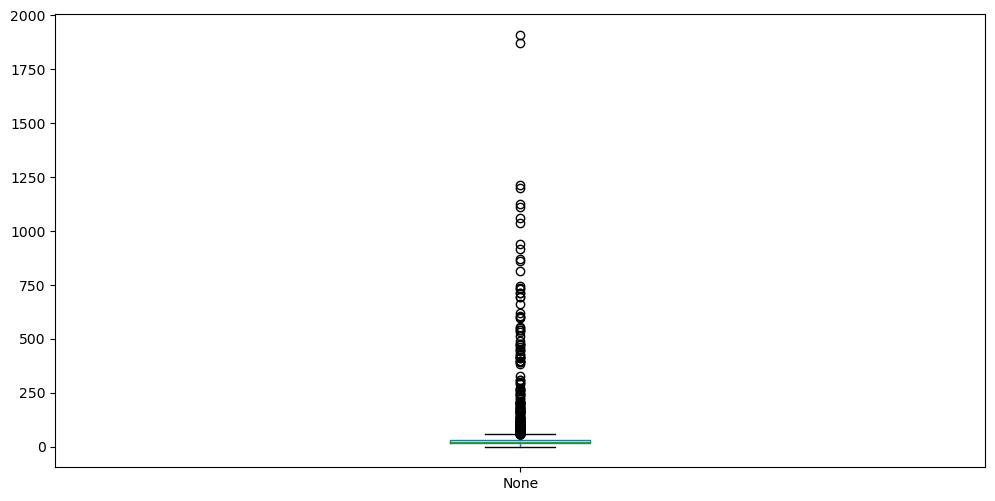

In [28]:
pd.Series(np.array(tokens_raw)).plot(kind="box")

In [34]:
aaa = np.array(tokens_raw)
np.unique(aaa.sum())

array([708337])

### 26000 messages
### the mean of the set is 144 chars, but it reaches 10000 chars on some messages 


(array([2.607e+04, 6.800e+01, 2.200e+01, 6.000e+00, 1.700e+01, 8.000e+00,
        5.000e+00, 7.000e+00, 1.000e+00, 4.000e+00, 1.000e+00, 3.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([   0. ,   95.5,  191. ,  286.5,  382. ,  477.5,  573. ,  668.5,
         764. ,  859.5,  955. , 1050.5, 1146. , 1241.5, 1337. , 1432.5,
        1528. , 1623.5, 1719. , 1814.5, 1910. ]),
 <a list of 20 Patch objects>)

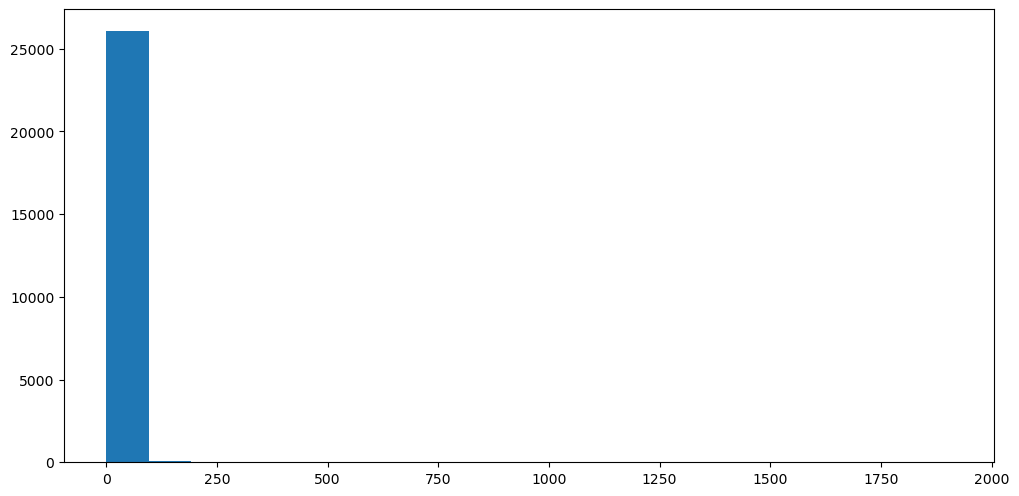

In [45]:
aaa = pd.Series(tokens_raw)
plt.hist(aaa, bins=20)

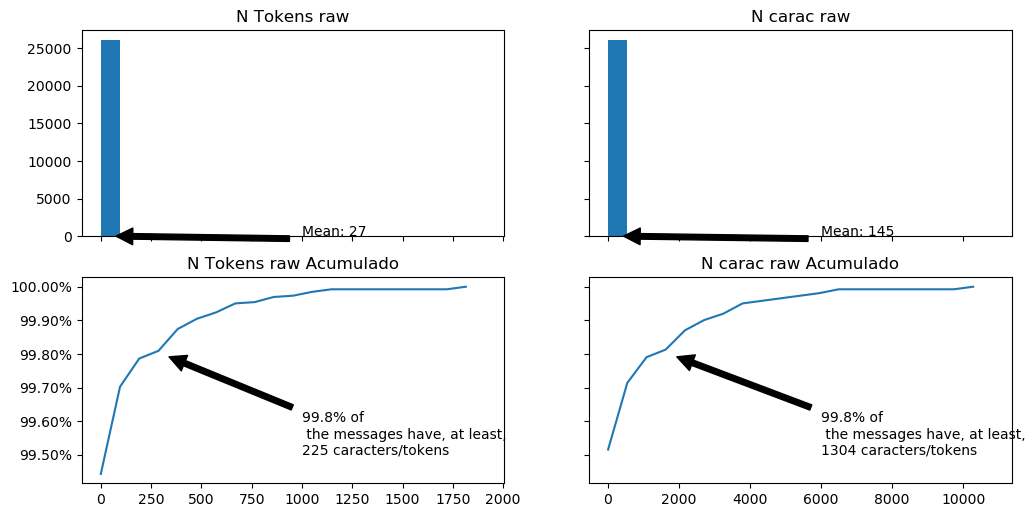

In [51]:
# Define o tamanho e resolução dos gráficos
plt.rcParams.update({'figure.figsize':(12,6), 'figure.dpi':100})

'''
    A lógica aqui é criar os gráficos por colunas, ja que é a mesma
    feature visualizada de maneiras diferentes. 
    
    Por isso a iteração passa pelas colunas utilizando axs[0,col]
    e axs[1,col] para o primeiro e segundo gŕaficos.

    No primeiro gráfico é um histograma com a frequencia de tamanho
    de descrição

    O segundo gráfico é a distribuição de frequência acumulada, para
    identificar quantos % das descrições tem x caracteres/tokens.
    
'''

# Define os subplots, pra deixar tudo junto
# Os pares de gráficos são cada coluna, por isso os eixos x são compartilhados
f, axs = plt.subplots(2,2, sharex= "col", sharey= "row")


for col, name in enumerate([("N Tokens raw", tokens_raw),
                            ("N carac raw", carac_raw)]):

    # O enumerate foi criado para ter acesso aos rótulos dos dados e às variáveis
    # col da o index, e name da uma tupla, name[0] eh str, name[1] é lista de int
    
    # condição usada para definir a coordenada x da anotação
    # xcord é declarado no inicio da iteração para nao ter erro de 
    # vir com o valor da iteração passada
    xcord = 6000 if (col==1) else 1000


    # desmembra o histograma em 'n' (altura dos bins)
    # e 'bins' (valor médio da coluna) para ter acesso
    (n, bins, patches) = axs[0,col].hist(name[1],bins=20)

    # Adiciona o nome do grafico ultilizando a variavel enumerada
    axs[0,col].set_title(name[0])



    # GRAFICOS DE CIMA #

    # annotate cria a flechinha com texto 
                # o primeiro argumento é a msg
    axs[0,col].annotate("Mean: {0:.0f}".format(np.mean(name[1])), 
                
                # 2 e 3 argumentos dao a posição da flecha
                xytext=(xcord,50), xy=(np.mean(name[1]),25),
                
                # arrowprops são cor e tamanho
                arrowprops=dict(facecolor='black', shrink=0.05))
    

    # GRAFICOS DE BAIXO #

    # aqui cria uma lista com os valores percentuais acumulados 
    # da feature em questão
    valores_acumulados = np.cumsum(n) / max(np.cumsum(n))

    # bins[:len(bins)-1] ocorre porque bins tem n+1 valores
    # esse len(bins) é pra funcionar com bins=n
    axs[1,col].plot(bins[:len(bins)-1], valores_acumulados*100)

    # annotate cria a outra flechinha, apontando pro x%
    axs[1,col].annotate("99.8% of \n the messages have, at least,\n{0:.0f} caracters/tokens ".format(np.percentile(name[1], 99.75, interpolation="lower")), 

            xytext=(xcord,99.50), xy=(np.percentile(name[1],99.8),99.8),

            arrowprops=dict(facecolor='black', shrink=0.05))

    axs[1,col].set_title(name[0] + " Acumulado")

    # vai alterar o valor dos ticks para ficar 40%
    axs[1,col].yaxis.set_major_formatter(PercentFormatter())


plt.show()

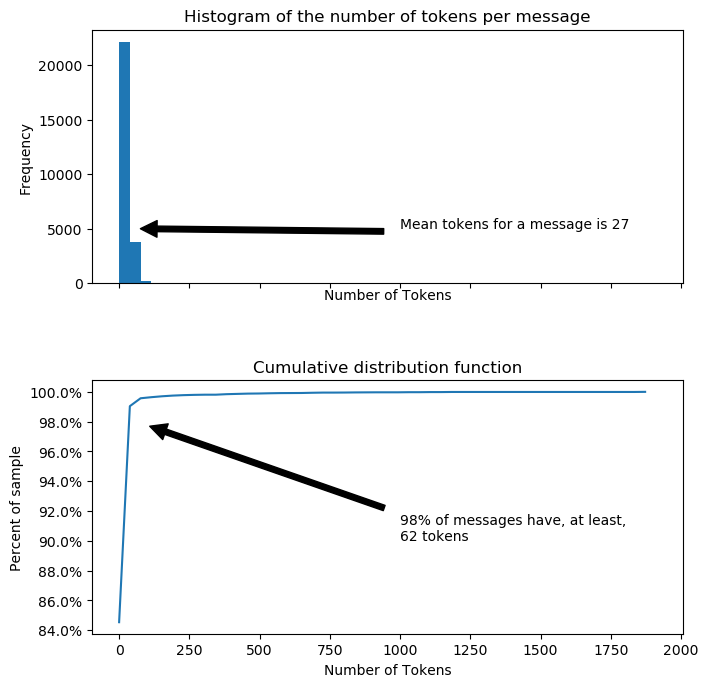

In [97]:
# Define o tamanho e resolução dos gráficos
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

'''
    A lógica aqui é criar os gráficos por colunas, ja que é a mesma
    feature visualizada de maneiras diferentes. 
    
    Por isso a iteração passa pelas colunas utilizando axs[0,col]
    e axs[1,col] para o primeiro e segundo gŕaficos.

    No primeiro gráfico é um histograma com a frequencia de tamanho
    de descrição

    O segundo gráfico é a distribuição de frequência acumulada, para
    identificar quantos % das descrições tem x caracteres/tokens.
    
'''

# Define os subplots, pra deixar tudo junto
# Os pares de gráficos são cada coluna, por isso os eixos x são compartilhados
f, axs = plt.subplots(2,1, sharex= "col")
f.tight_layout(pad=6.0)

for col, name in enumerate([("N Tokens raw", tokens_raw)]):
    # O enumerate foi criado para ter acesso aos rótulos dos dados e às variáveis
    # col da o index, e name da uma tupla, name[0] eh str, name[1] é lista de int
    
    # condição usada para definir a coordenada x da anotação
    # xcord é declarado no inicio da iteração para nao ter erro de 
    # vir com o valor da iteração passada
    xcord = 1000


    # desmembra o histograma em 'n' (altura dos bins)
    # e 'bins' (valor médio da coluna) para ter acesso
    (n, bins, patches) = axs[0].hist(name[1],bins=50)

    # Adiciona o nome do grafico ultilizando a variavel enumerada
    axs[0].set_title("Histogram of the number of tokens per message")



    # GRAFICOS DE CIMA #

    # annotate cria a flechinha com texto 
                # o primeiro argumento é a msg
    axs[0].annotate("Mean tokens for a message is {0:.0f}".format(np.mean(name[1])), 
                
                # 2 e 3 argumentos dao a posição da flecha
                xytext=(xcord,5000), xy=(np.mean(name[1]),5000),
                
                # arrowprops são cor e tamanho
                arrowprops=dict(facecolor='black', shrink=0.05))

    axs[0].set_xlabel('Number of Tokens')
    axs[0].set_ylabel('Frequency')
    

    # GRAFICOS DE BAIXO #

    # aqui cria uma lista com os valores percentuais acumulados 
    # da feature em questão
    valores_acumulados = np.cumsum(n) / max(np.cumsum(n))

    # bins[:len(bins)-1] ocorre porque bins tem n+1 valores
    # esse len(bins) é pra funcionar com bins=n
    axs[1].plot(bins[:len(bins)-1], valores_acumulados*100)

    # annotate cria a outra flechinha, apontando pro x%
    axs[1].annotate("98% of messages have, at least,\n{0:.0f} tokens ".format(np.percentile(name[1], 98, interpolation="lower")), 

            xytext=(xcord,90), xy=(np.percentile(name[1],98),98),

            arrowprops=dict(facecolor='black', shrink=0.05))

    axs[1].set_title("Cumulative distribution function")

    # vai alterar o valor dos ticks para ficar 40%
    axs[1].yaxis.set_major_formatter(PercentFormatter())

    axs[1].set_xlabel('Number of Tokens')
    axs[1].set_ylabel('Percent of sample')


plt.show()

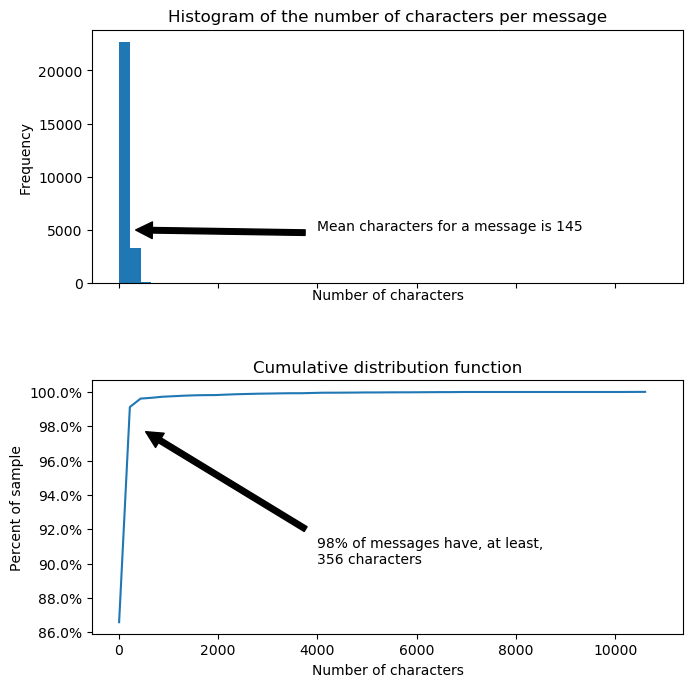

In [100]:
# Define o tamanho e resolução dos gráficos
plt.rcParams.update({'figure.figsize':(8,8), 'figure.dpi':100})

'''
    A lógica aqui é criar os gráficos por colunas, ja que é a mesma
    feature visualizada de maneiras diferentes. 
    
    Por isso a iteração passa pelas colunas utilizando axs[0,col]
    e axs[1,col] para o primeiro e segundo gŕaficos.

    No primeiro gráfico é um histograma com a frequencia de tamanho
    de descrição

    O segundo gráfico é a distribuição de frequência acumulada, para
    identificar quantos % das descrições tem x caracteres/tokens.
    
'''

# Define os subplots, pra deixar tudo junto
# Os pares de gráficos são cada coluna, por isso os eixos x são compartilhados
f, axs = plt.subplots(2,1, sharex= "col")
f.tight_layout(pad=6.0)

for col, name in enumerate([("N carac raw", carac_raw)]):
    # O enumerate foi criado para ter acesso aos rótulos dos dados e às variáveis
    # col da o index, e name da uma tupla, name[0] eh str, name[1] é lista de int
    
    # condição usada para definir a coordenada x da anotação
    # xcord é declarado no inicio da iteração para nao ter erro de 
    # vir com o valor da iteração passada
    xcord = 4000


    # desmembra o histograma em 'n' (altura dos bins)
    # e 'bins' (valor médio da coluna) para ter acesso
    (n, bins, patches) = axs[0].hist(name[1],bins=50)

    # Adiciona o nome do grafico ultilizando a variavel enumerada
    axs[0].set_title("Histogram of the number of characters per message")



    # GRAFICOS DE CIMA #

    # annotate cria a flechinha com texto 
                # o primeiro argumento é a msg
    axs[0].annotate("Mean characters for a message is {0:.0f}".format(np.mean(name[1])), 
                
                # 2 e 3 argumentos dao a posição da flecha
                xytext=(xcord,5000), xy=(np.mean(name[1]),5000),
                
                # arrowprops são cor e tamanho
                arrowprops=dict(facecolor='black', shrink=0.05))

    axs[0].set_xlabel('Number of characters')
    axs[0].set_ylabel('Frequency')
    

    # GRAFICOS DE BAIXO #

    # aqui cria uma lista com os valores percentuais acumulados 
    # da feature em questão
    valores_acumulados = np.cumsum(n) / max(np.cumsum(n))

    # bins[:len(bins)-1] ocorre porque bins tem n+1 valores
    # esse len(bins) é pra funcionar com bins=n
    axs[1].plot(bins[:len(bins)-1], valores_acumulados*100)

    # annotate cria a outra flechinha, apontando pro x%
    axs[1].annotate("98% of messages have, at least,\n{0:.0f} characters ".format(np.percentile(name[1], 98, interpolation="lower")), 

            xytext=(xcord,90), xy=(np.percentile(name[1],98),98),

            arrowprops=dict(facecolor='black', shrink=0.05))

    axs[1].set_title("Cumulative distribution function")

    # vai alterar o valor dos ticks para ficar 40%
    axs[1].yaxis.set_major_formatter(PercentFormatter())

    axs[1].set_xlabel('Number of characters')
    axs[1].set_ylabel('Percent of sample')


plt.show()